# Import packages

In [1]:
# import packages
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import pylab as pl
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from random import *
from sklearn.model_selection import train_test_split
import sklearn.model_selection as cross_validation
from collections import OrderedDict

C:\Users\megan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Import the data .txt file, clean it, and convert to CSV

In cleaning, we remove empty value types and replace all with 'None'. We also added indicator columns for missing contact information for later analysis.

In [13]:
# make a new dataframe where all null values are replaces with None

dataframe = pd.DataFrame()
row_data = {}

count = 1
with open('poea_dataset.txt') as in_file:
    for line in in_file:
        if line != '\n':
            if count == 1:
                row_data['Name'] = line.strip('\n').strip()
            if count == 2: 
                row_data['Address'] = line.strip('\n').strip()
            if count in [3,4,5,6,7,8]:
                col = line.split(':')[0].strip()
                val = line.split(':')[1].strip('\n').strip()
                row_data[col] = val
            count += 1
        else:
            if row_data['Status'] == 'Valid License':
                row_data['Negative Status'] = False
            else:
                row_data['Negative Status'] = True
            
            if row_data['Email Address'] in ['', 'None', 'NA']:
                row_data['Email Missing'] = True
                row_data['Email Address'] = None
            else:
                row_data['Email Missing'] = False
                
            if row_data['Official Representative'] in ['', 'NA', 'N/A']:
                row_data['Representative Missing'] = True
                row_data['Official Representative'] = None
            else:
                row_data['Representative Missing'] = False
            
            if row_data['Tel No/s'] in ['', 'NA', 'FOR INSTALLATION']:
                row_data['Telephone Missing'] = True
                row_data['Tel No/s'] = None
            else:
                row_data['Telephone Missing'] = False
            
            if row_data['Website'] in ['', 'None', 'NA', 'N/A', 'NONE', 'http', 'FB Acct']:
                row_data['Website Missing'] = True
                row_data['Website'] = None
            else:
                row_data['Website Missing'] = False
            
            if row_data['Address'] == 'NO ADDRESS':
                row_data['Address Missing'] = True
                row_data['Address'] = None
            else:
                row_data['Address Missing'] = False
                
            new_row = pd.DataFrame(data = row_data, index = [0])
            dataframe = dataframe.append(new_row, ignore_index = True)
            count = 1
            row_data = {}

# See dataframe format

In [14]:
dataframe

,Address,Address Missing,Email Address,Email Missing,License Validity,Name,Negative Status,Official Representative,Representative Missing,Status,Tel No/s,Telephone Missing,Website,Website Missing
0,R 20 G/F & 33B 2/F MIDLAND PLAZA HOTEL M ADRIA...,False,brilliant_minds1015@yahoo.com,False,9/11/2017 to 9/11/2019,1015 BRILLIANT MINDS INC Private Employment Ag...,False,ANITA A COBER,False,Valid License,(02) 2522338 / 2515100,False,None,True
1,R602 DOÃƒâ€˜A F SYJUCO BLG 1872 REMEDIOS COR T...,False,CARGOFLEET@MARC-SHIPS.COM,False,11/4/2011 to 11/3/2015,1022 MARITIME SERVICES CORPORATION Manning Agency,True,None,True,Ceased Operations,5362997 5360831,False,None,True
2,"2F & 3F, 1523-1527 M.H. DEL PILAR ST ERMITA, M...",False,tenthstorypai@yahoo.com,False,4/2/2016 to 4/1/2020,"10TH STORY PLACEMENT AGENCY, INC. Private Empl...",False,MR ALFONSO UY NG,False,Valid License,3531581,False,www.10thstory.com,False
3,2F&3FCORA ROSE BRIDALS CUENCA GONZAGA JUAN BAC...,False,None,True,3/28/2001 to 3/28/2003,168 PLACEMENT CORPORATION Private Employment A...,True,MA LISA G LOPEZ,False,Delisted,4336267,False,None,True
4,"2FLR 118 J DEL ROSARIO ST., DONA PETRA SUBD TU...",False,168yelufa_hr@yahoo.com,False,1/28/2008 to 1/28/2012,168 YE LU FA INTERNATIONAL MANPOWER AND PROMOT...,True,JAMES T. ONG LOPEZ,False,Delisted,516-8893,False,None,True
5,"3/F ANGELA GAW BLG.1170 SN ANDRES ST. MALATE, ...",False,FIRSTAKCES_MANPOWER@HOTMAIL.COM,False,12/23/2006 to 6/23/2007,1ST AKCES MANPOWER INC (FORMERLY CHAYAN MAN PR...,True,NORMANDY P. REYES,False,Cancelled,5243869,False,None,True
6,"3F, JLC BLDG, NO. 8 N. RAMIREZ STREET DON MANU...",False,1stdynamicpersonnel@gmail.com,False,4/8/2014 to 4/8/2018,1ST DYNAMIC PERSONNEL RESOURCES INC. Private E...,False,CATHERINE LIANA Z CHUA,False,Valid License,(02) 416-1848,False,www.1stdynamicpersonnel.com,False
7,31A GB BLDG MONTEVERDE ST DAVAO CITY DAVAO CIT...,False,None,True,8/18/2006 to 8/18/2007,1ST FILIPINO OVERSEAS RECRUITMENT AGENCY (FORA...,True,LORENZO ANG,False,Delisted,None,True,None,True
8,"U16,12,24,25,47,48,49&50 CITYLAND COND 128 PIO...",False,firstnorthern_international@yahoo.com,False,12/30/2017 to 12/29/2021,1ST NORTHERN INTERNATIONAL PLACEMENT INC Priva...,False,ANCHIE A SIBAL,False,Valid License,6381981/6381982,False,None,True
9,"U14&15, DON GRACIANO BLG, 1180 E RODRIGUEZ SR ...",False,info@2000miles.org / 2000miles.pac@gmail.com,False,9/28/2015 to 9/27/2019,"2000 MILES PLACEMENT AGENCY, INC. (FOR:GEOSONS...",False,EMILIA S POBLETE,False,Valid License,4148717/ 4168229/ 6615388/ 09209503504,False,www.2000miles.org,False


### save to .csv file

In [15]:
dataframe.to_csv(path_or_buf = 'data.csv', sep=',', index = False, header = True)

In [6]:
dataframe = pd.read_csv('data.csv')

# Start Data Analysis

In [8]:
# get list of license statuses
status_list = Counter(dataframe['Status'])
status_list

Counter({'Cancelled': 823,
         'Cash Bond Withdrawn': 3,
         'Ceased Operations': 11,
         'Delisted': 1197,
         'Denied Renewal': 25,
         'Expired': 35,
         'Forever Banned': 167,
         'Inactive': 86,
         'Preventive Suspension': 1,
         'Revoked': 11,
         'Suspended': 32,
         'Suspended (Document Processing)': 19,
         'Valid License': 1256})

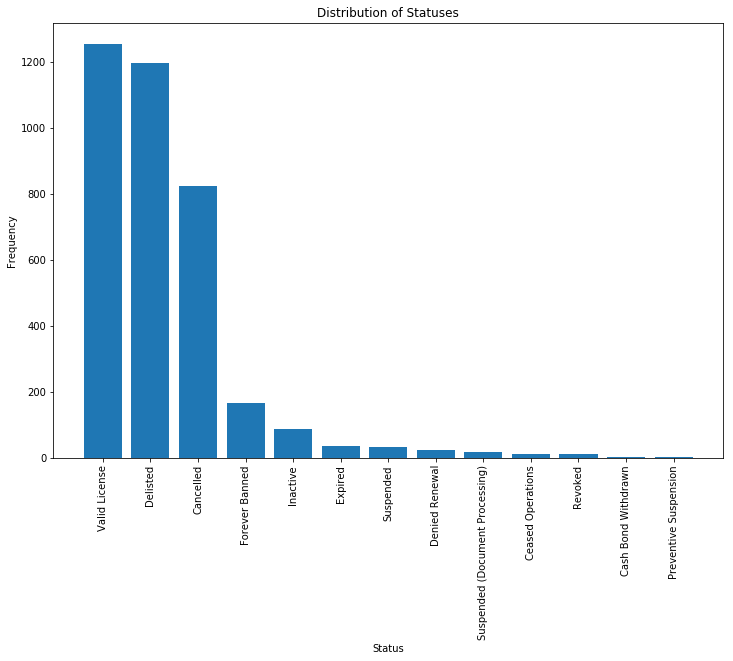

In [94]:
lists = [(k, status_list[k]) for k in sorted(dict(status_list), key = dict(status_list).get, reverse = True)]

category, height = zip(*lists)
x_position = np.arange(len(status_list)

fig, ax = plt.subplots(figsize = (12,8))
plt.title('Distribution of Statuses')
plt.ylabel('Frequency')
plt.xlabel('Status')

# Create bars
plt.bar(x_position, height)
 
# Create names on the x-axis
plt.xticks(x_position, category, rotation = 'vertical')
 
# Show graphic
plt.show()

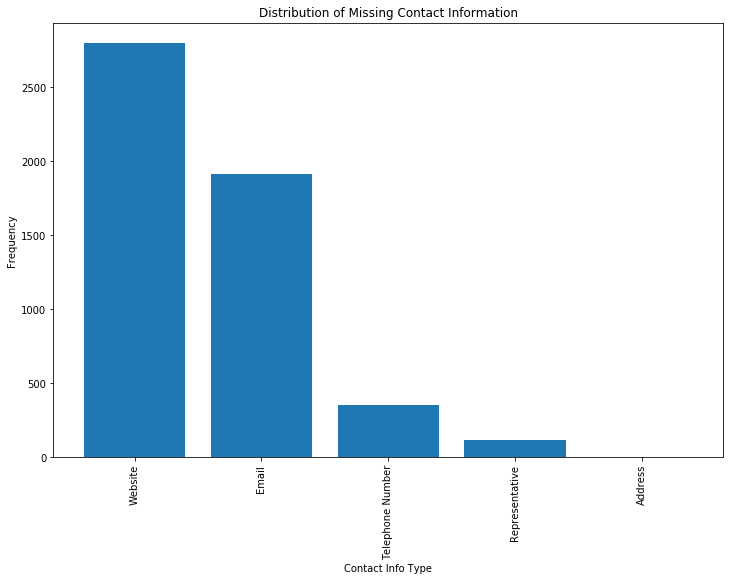

In [34]:
num_email_missing = Counter(dataframe['Email Address'])[None]
num_rep_missing = Counter(dataframe['Official Representative'])[None]
num_phone_missing = Counter(dataframe['Tel No/s'])[None]
num_website_missing = Counter(dataframe['Website'])[None]
num_address_missing = Counter(dataframe['Address'])[None]

missing = {'email': num_email_missing, 'rep': num_rep_missing, 'phone': num_phone_missing, 'website': num_website_missing, 'address': num_address_missing}

lists = [(k, missing[k]) for k in sorted(missing, key = missing.get, reverse = True)]

category, height = zip(*lists)
x_position = np.arange(len(missing))

fig, ax = plt.subplots(figsize = (12,8))
plt.title('Distribution of Missing Contact Information')
plt.ylabel('Frequency')
plt.xlabel('Contact Info Type')

# Create bars
plt.bar(x_position, height)
 
# Create names on the x-axis
plt.xticks(x_position, ['Website', 'Email', 'Telephone Number', 'Representative', 'Address'], rotation = 'vertical')
 
# Show graphic
plt.show()

# Logistic Regression

## Find correlation between missing contact info and license status

In [81]:
# split data into training and test
train_dataframe, test_dataframe = train_test_split(dataframe, test_size=0.4)

In [123]:
train_dataframe.to_csv(path_or_buf = 'train_data.csv', sep=',', index = False, header = True)
test_dataframe.to_csv(path_or_buf = 'test_data.csv', sep=',', index = False, header = True)

In [2]:
train_dataframe = pd.read_csv('train_data.csv')
test_dataframe = pd.read_csv('test_data.csv')

In [3]:
##### start with all factors
train_cols = ['Address Missing', 'Email Missing', 'Representative Missing', 'Website Missing', 'Telephone Missing']

logit = sm.Logit(train_dataframe['Negative Status'], train_dataframe[train_cols])

# fit the model
result = logit.fit()

# results of logistic regression
print (result.summary())

print('\n------Odds Ratios and their confidendence intervals------------ \n')

# odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf))

         Current function value: 0.393860
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:        Negative Status   No. Observations:                 2199
Model:                          Logit   Df Residuals:                     2194
Method:                           MLE   Df Model:                            4
Date:                Tue, 01 May 2018   Pseudo R-squ.:                  0.3842
Time:                        16:10:09   Log-Likelihood:                -866.10
converged:                      False   LL-Null:                       -1406.5
                                        LLR p-value:                1.071e-232
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Address Missing          -31.3716   6.03e+05   -5.2e-05      1.000   -1.18e+06    1.18e+06
Email Missing              3.

C:\Users\megan\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\megan\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


##### Missing address and missing phone number are not significant predictors of negative status (p = 1, p > 0.5, respectively). Remove them.

In [4]:
# remove insignificant factors from above, namely Address Missing and Telephone Missing
train_cols = ['Email Missing', 'Representative Missing', 'Website Missing']

logit = sm.Logit(train_dataframe['Negative Status'], train_dataframe[train_cols])

# fit the model
result = logit.fit()

# results of logistic regression
print (result.summary())

print('\n------Odds Ratios and their confidendence intervals------------ \n')

# odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.395993
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        Negative Status   No. Observations:                 2199
Model:                          Logit   Df Residuals:                     2196
Method:                           MLE   Df Model:                            2
Date:                Tue, 01 May 2018   Pseudo R-squ.:                  0.3809
Time:                        16:10:13   Log-Likelihood:                -870.79
converged:                       True   LL-Null:                       -1406.5
                                        LLR p-value:                2.152e-233
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Email Missing              3.7839      0.193     19.572      0.000       3.405      

##### Email Missing, Representative Missing, and Website Missing are all significant (p < 0.002, each). And the accuracy (R-sq) of the model is 0.3650.

##### When a broker is missing an email, they are 44 times more likely to have a negative status. When a broker is missing a representative, they are 3.2 times as likely to have a negative status. When a broker is missing a website, they are 30% less likely to have a negative status.

# Cross-Validate Model on Test Data

In [94]:
# evaluate the model on the test data

def evaluate(y_train, X_train, y_test, X_test, threshold):

    # learn model on training data
    logit = sm.Logit(y_train, X_train)
    result = logit.fit(disp=False)
    
    # make probability predictions on test data
    y_pred = result.predict(X_test)
    
    # threshold probabilities to create classifications
    y_pred = y_pred > threshold
    
    # report metrics
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    return precision, recall

cols = ['Email Missing', 'Representative Missing', 'Website Missing']
precision, recall = evaluate(train_dataframe['Negative Status'], train_dataframe[cols], 
                             test_dataframe['Negative Status'], test_dataframe[cols], 0.5)

print('\nPrecision: {:0.3f}, Recall: {:0.3f}'.format(precision,recall))


Precision: 0.958, Recall: 0.782


**Where "precision" is the fraction of our classified "Trues" that are correct, and "recall" is the fraction of actual "Trues" that we correctly identify.**

In [95]:
# find the AVERAGE accuracy over many iterations of training/test data

cols = ['Email Missing', 'Representative Missing', 'Website Missing']

PR = []
for i in range(20):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(
            dataframe[cols], dataframe['Negative Status'],
            test_size=0.4)
    PR.append(evaluate(y_train, X_train, y_test, X_test, 0.5))

In [96]:
avgPrec = np.mean([f[0] for f in PR])
avgRec = np.mean([f[1] for f in PR])
print('\nAverage Precision: {:0.3f}, Average Recall: {:0.3f}'.format(avgPrec, avgRec))


Average Precision: 0.956, Average Recall: 0.782


### Check classification threshold

In [97]:
# find the best threshold for classifying as True or False negative status
# (so far we have been using 0.5)

import warnings
warnings.filterwarnings("ignore")
def evalThresh(df, thresh):
    PR = []
    for i in range(20):
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(dataframe[cols], 
                                                                             dataframe['Negative Status'], 
                                                                             test_size=0.4)
        PR.append(evaluate(y_train, X_train, y_test, X_test, thresh))
    avgPrec = np.mean([f[0] for f in PR])
    avgRec = np.mean([f[1] for f in PR])
    return 2 * (avgPrec * avgRec) / (avgPrec + avgRec), avgPrec, avgRec

tvals = np.linspace(0.05, 0.8, 50)
f1vals = [evalThresh(dataframe, tval)[0] for tval in tvals]

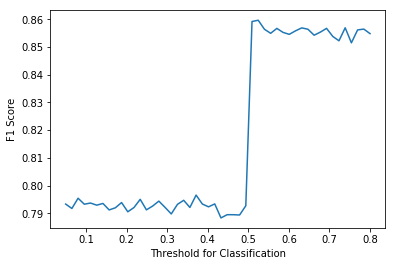

In [98]:
plt.plot(tvals,f1vals)
plt.ylabel('F1 Score')
_=plt.xlabel('Threshold for Classification')

From the plot above, we see that 0.5 is indeed the best threshold

In [99]:
F1, Prec, Rec = evalThresh(dataframe, 0.5)
print('Best Precision: {:0.3f}, Best Recall: {:0.3f}'.format(Prec, Rec))

Best Precision: 0.955, Best Recall: 0.785


### Evaluate ROC Curve

In [90]:
def evaluate_ROC(y_train, X_train, y_test, X_test):

    # learn model on training data
    logit = sm.Logit(y_train, X_train)
    result = logit.fit(disp=False)
    
    # make probability predictions on test data
    y_pred = result.predict(X_test)
    
    # build ROC 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    return fpr, tpr, thresholds, roc_auc

fpr, tpr, thresholds, roc_auc = evaluate_ROC(train_dataframe['Negative Status'], train_dataframe[cols], 
                                             test_dataframe['Negative Status'], test_dataframe[cols])

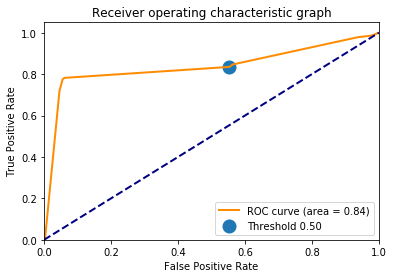

In [100]:
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic graph')

# Mark the point corresponding to threshold 0.5
best_i = np.argmin(np.abs(thresholds - 0.5))
plt.scatter([fpr[best_i]], [tpr[best_i]], linewidths=[4*lw], label='Threshold %0.2f' % thresholds[best_i])

plt.legend(loc="lower right")
plt.show()

# Find Ownership Groups

In [10]:
# get the count of each contact information field
# if something is counted more than once, it means multiple brokers list that as their contact info
# this could suggest ownership groups over multiple labor brokers

address_sum = dict(Counter(dataframe['Address']))
phone_sum = dict(Counter(dataframe['Tel No/s']))
reps_sum = dict(Counter(dataframe['Official Representative']))
website_sum = dict(Counter(dataframe['Website']))
email_sum = dict(Counter(dataframe['Email Address']))

# in the event that we want to print this later and see them sorted
sorted_address_sum = [(k, address_sum[k]) for k in sorted(address_sum, key = address_sum.get, reverse = True) if (address_sum[k] > 1 and k is not None)]
sorted_phone_sum = [(k, phone_sum[k]) for k in sorted(phone_sum, key = phone_sum.get, reverse = True) if (phone_sum[k] > 1 and k is not None)]
sorted_reps_sum = [(k, reps_sum[k]) for k in sorted(reps_sum, key = reps_sum.get, reverse = True) if (reps_sum[k] > 1 and k is not None)]
sorted_website_sum = [(k, website_sum[k]) for k in sorted(website_sum, key = website_sum.get, reverse = True) if (website_sum[k] > 1 and k is not None)]
sorted_email_sum = [(k, email_sum[k]) for k in sorted(email_sum, key = email_sum.get, reverse = True) if (email_sum[k] > 1 and k is not None)]

In [11]:
# print repeated contact info
sorted_repeated_info = sorted_address_sum + sorted_phone_sum + sorted_reps_sum + sorted_website_sum + sorted_email_sum
repeated_info_df = pd.DataFrame(data = sorted_repeated_info, columns = ['Contact Info', 'Frequency']).sort_values(by = 'Frequency', ascending = False).reset_index(drop=True)
repeated_info_df

,Contact Info,Frequency
0,GREGORIO F ORTEGA,6
1,GREGORIO F. ORTEGA,5
2,MS ANGELINA T RIVERA,5
3,CAPT ROSENDO C HERRERA,5
4,5211566 / 5211567,4
5,MR REGINALDO A OBEN,4
6,MR CESAR P CARANDANG,3
7,NARCISSUS L. DURAN,3
8,MR AKIRA S KATO,3
9,ARLEEN V ASUNCION,3


In [54]:
# number of brokers that share some sort of contact info
print(sum(repeated_info_df['Frequency']))

422


In [55]:
repeated_info_df.to_csv(path_or_buf = 'repeated contact info and the number of brokers assocaited with it.csv', sep=',', index = False, header = True)

#### Now find number of violations associated with repeated contact info

In [49]:
number_of_violations = {}
ownership_groups = [i for i in address_sum if (address_sum[i] > 1 and i is not None)] + [i for i in reps_sum if (reps_sum[i] > 1 and i is not None)] + [i for i in phone_sum if (phone_sum[i] > 1 and i is not None)] + [i for i in email_sum if (email_sum[i] > 1 and i is not None)] + [i for i in website_sum if (website_sum[i] > 1 and i is not None)]

for index, row in dataframe.iterrows():
    if row['Negative Status'] == True:
        for field in row:
            if field in ownership_groups:
                if field in number_of_violations:
                    number_of_violations[field] += 1
                else:
                    number_of_violations[field] = 1       

In [50]:
sorted_violations = [(k, number_of_violations[k]) for k in sorted(number_of_violations, key = number_of_violations.get, reverse = True)]
ownership_groups_df = pd.DataFrame(data = sorted_violations, columns = ['Ownership Group', 'Number of Violations'])
ownership_groups_df

,Ownership Group,Number of Violations
0,MS ANGELINA T RIVERA,5
1,CAPT ROSENDO C HERRERA,4
2,MR REGINALDO A OBEN,3
3,MR AKIRA S KATO,3
4,MR CESAR P CARANDANG,3
5,MR BONIFACIO F GOMEZ,3
6,"RM 202 2F KIMVI BLDG 1191 MA OROSA ST ERMITA, ...",2
7,ims_3r@yahoo.com,2
8,MR ROLANDO P MALIG,2
9,886870 / 8163199,2


In [51]:
print(sum(ownership_groups_df['Number of Violations']))

278


In [118]:
ownership_groups_df.to_csv(path_or_buf = 'repeated contact info and their violations.csv', sep=',', index = False, header = True)

**Above, we see the contact information that is associate with multiple labor brokers -- indicating multiple labor brokers are associated with the same "ownership group" that uses this contact information -- and the number of labor violations that are associated with this contact information. We see that the official representative "MS ANGELINA T RIVERA" is associated with 5 license violations, and the official representative "CAPT ROSENDO C HERRERA" is associated with 4 license violations.**

# Find repeated contact information

In [62]:
repeated_info = list(repeated_info_df['Contact Info'])
repeated_info_indicator = []

for index, row in dataframe.iterrows():
    if (row['Address'] in repeated_info 
        or row['Email Address'] in repeated_info
        or row['Official Representative'] in repeated_info
        or row['Tel No/s'] in repeated_info
        or row['Website'] in repeated_info):
        repeated_info_indicator += [True]
    else:
        repeated_info_indicator += [False]

In [64]:
dataframe['repeated_info'] = repeated_info_indicator

In [65]:
dataframe

,Address,Address Missing,Email Address,Email Missing,License Validity,Name,Negative Status,Official Representative,Representative Missing,Status,Tel No/s,Telephone Missing,Website,Website Missing,repeated_info
0,R 20 G/F & 33B 2/F MIDLAND PLAZA HOTEL M ADRIA...,False,brilliant_minds1015@yahoo.com,False,9/11/2017 to 9/11/2019,1015 BRILLIANT MINDS INC Private Employment Ag...,False,ANITA A COBER,False,Valid License,(02) 2522338 / 2515100,False,None,True,False
1,R602 DOÃƒâ€˜A F SYJUCO BLG 1872 REMEDIOS COR T...,False,CARGOFLEET@MARC-SHIPS.COM,False,11/4/2011 to 11/3/2015,1022 MARITIME SERVICES CORPORATION Manning Agency,True,None,True,Ceased Operations,5362997 5360831,False,None,True,False
2,"2F & 3F, 1523-1527 M.H. DEL PILAR ST ERMITA, M...",False,tenthstorypai@yahoo.com,False,4/2/2016 to 4/1/2020,"10TH STORY PLACEMENT AGENCY, INC. Private Empl...",False,MR ALFONSO UY NG,False,Valid License,3531581,False,www.10thstory.com,False,False
3,2F&3FCORA ROSE BRIDALS CUENCA GONZAGA JUAN BAC...,False,None,True,3/28/2001 to 3/28/2003,168 PLACEMENT CORPORATION Private Employment A...,True,MA LISA G LOPEZ,False,Delisted,4336267,False,None,True,False
4,"2FLR 118 J DEL ROSARIO ST., DONA PETRA SUBD TU...",False,168yelufa_hr@yahoo.com,False,1/28/2008 to 1/28/2012,168 YE LU FA INTERNATIONAL MANPOWER AND PROMOT...,True,JAMES T. ONG LOPEZ,False,Delisted,516-8893,False,None,True,False
5,"3/F ANGELA GAW BLG.1170 SN ANDRES ST. MALATE, ...",False,FIRSTAKCES_MANPOWER@HOTMAIL.COM,False,12/23/2006 to 6/23/2007,1ST AKCES MANPOWER INC (FORMERLY CHAYAN MAN PR...,True,NORMANDY P. REYES,False,Cancelled,5243869,False,None,True,False
6,"3F, JLC BLDG, NO. 8 N. RAMIREZ STREET DON MANU...",False,1stdynamicpersonnel@gmail.com,False,4/8/2014 to 4/8/2018,1ST DYNAMIC PERSONNEL RESOURCES INC. Private E...,False,CATHERINE LIANA Z CHUA,False,Valid License,(02) 416-1848,False,www.1stdynamicpersonnel.com,False,False
7,31A GB BLDG MONTEVERDE ST DAVAO CITY DAVAO CIT...,False,None,True,8/18/2006 to 8/18/2007,1ST FILIPINO OVERSEAS RECRUITMENT AGENCY (FORA...,True,LORENZO ANG,False,Delisted,None,True,None,True,False
8,"U16,12,24,25,47,48,49&50 CITYLAND COND 128 PIO...",False,firstnorthern_international@yahoo.com,False,12/30/2017 to 12/29/2021,1ST NORTHERN INTERNATIONAL PLACEMENT INC Priva...,False,ANCHIE A SIBAL,False,Valid License,6381981/6381982,False,None,True,False
9,"U14&15, DON GRACIANO BLG, 1180 E RODRIGUEZ SR ...",False,info@2000miles.org / 2000miles.pac@gmail.com,False,9/28/2015 to 9/27/2019,"2000 MILES PLACEMENT AGENCY, INC. (FOR:GEOSONS...",False,EMILIA S POBLETE,False,Valid License,4148717/ 4168229/ 6615388/ 09209503504,False,www.2000miles.org,False,False


# Analyze effect of repeated contact information on license status

In [114]:
# perform logistic regression

logit = sm.Logit(dataframe['Negative Status'], dataframe['repeated_info'])

# fit the model
result = logit.fit()

print(result.summary())

print('\n------Odds Ratios and their confidendence intervals------------ \n')

# odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.690256
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:        Negative Status   No. Observations:                 3666
Model:                          Logit   Df Residuals:                     3665
Method:                           MLE   Df Model:                            0
Date:                Thu, 26 Apr 2018   Pseudo R-squ.:                -0.07391
Time:                        20:36:23   Log-Likelihood:                -2530.5
converged:                       True   LL-Null:                       -2356.3
                                        LLR p-value:                       nan
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
repeated_info     0.5653      0.125      4.514      0.000       0.320       0.811

------Odds Ratios a

In [116]:
x = sum(dataframe['repeated_info'])
print(x, 'labor brokers have repeated contact info')

276 labor brokers have repeated contact info


In [117]:
y = sum(dataframe[dataframe['repeated_info'] == True]['Negative Status'])
print(y, 'labor brokers with repeated contact info have a license violation')

176 labor broker with repeated contact info have a license violations


# Make a .csv file of actual ownership groups and the names of labor brokers in them, to send to Verite

In [194]:
contact_info = []
ownership_groups_contact_info = {}
ownership_groups = {}
n = 0
for index, row in dataframe.iterrows():
    if row['repeated_info'] == True:
        ci = [row['Address'], row['Email Address'], row['Website'], row['Tel No/s'], row['Official Representative']]
        while None in ci:
            ci.remove(None)
        in_group = False
        for entry in ci:
            if entry in contact_info:
                for group in ownership_groups:
                    if entry in ownership_groups_contact_info[group]:
                        ownership_groups[group] += [row['Name']]
                        ownership_groups[group][0] += row['Negative Status']
                        in_group = True
        if in_group == False:
            contact_info += ci
            label = 'Ownership Group ' + str(n)
            ownership_groups[label] = [int(row['Negative Status']), row['Name']]
            ownership_groups_contact_info[label] = ci
            n += 1

In [200]:
for group in ownership_groups:
    num_brokers = len(ownership_groups[group])
    if num_brokers < 8:
        ownership_groups[group] += [''] * (8 - num_brokers)

In [204]:
og_df = pd.DataFrame(data = OrderedDict(ownership_groups))
og_df = og_df.rename(index = {0: 'Number of Violations'})
og_df

,Ownership Group 0,Ownership Group 1,Ownership Group 2,Ownership Group 3,Ownership Group 4,Ownership Group 5,Ownership Group 6,Ownership Group 7,Ownership Group 8,Ownership Group 9,...,Ownership Group 118,Ownership Group 119,Ownership Group 120,Ownership Group 121,Ownership Group 122,Ownership Group 123,Ownership Group 124,Ownership Group 125,Ownership Group 126,Ownership Group 127
Number of Violations,2,2,1,2,2,0,0,2,2,0,...,0,1,2,0,0,4,3,3,1,4
1,2000 MILLENNIUM MARITIME AND SHIPPING AGENCY M...,3 R`S OVERSEAS PLACEMENT CORPORATION Authority...,525 PRIMERA HUMAN RESOURCES SERVICES INC Priva...,A & A INTERNATIONAL RECRUITMENT & PLACEMENT Pr...,AA INTERNATIONAL BUSINESS VENTURE INC Service...,AEGISCREW MANNING INC(FORMERLY GREAT MARITIME ...,"AERO ALLIED INTERNATIONAL, INC. Private Employ...",AIMS SHIPMANAGEMENT CORPORATION Manning Agency,AL-MUSTANEER MANPOWER SUPPLY Service Contractor,AMINTA CREW MANAGEMENT INC Manning Agency,...,SOUTHEAST ASIA SHIPPING CORP Manning Agency,"STERLING RESOURCES INTERNATIONAL MANPOWER, INC...",SUN CARRIERS CORPORATION Philippine Registere...,"SUPPLY OILFIELD & MARINE PERSONNEL SERVICES, I...",SYCAMORE GLOBAL SHIPPING CORPORATION Philippin...,TIERRA MAR SERVICES INC (FOR TIERRA MAR SHIPPI...,TOP RATE INTERNATIONAL SERVICES INC Private E...,TRANSPACIFIC TOWAGE INC Manning Agency,UNITED PHILIPPINE LINES INC Private Employment...,WALLEM MARITIME SERVICES INC Manning Agency
2,"EXPERTS PLACEMENT AGENCY, INC. Private Employm...",3R INTERNATIONAL MANPOWER SERVICES Private Emp...,PRIMERA HUMAN RESOURCE SERVICES Private Employ...,RMF INTERNATIONAL PLACEMENT INC Service Contr...,ARKCOR INC Service Contractor,RIELT MARITIME INC Manning Agency,CONCEPT PLACEMENT RESOURCES INC (CONCEPT MANAG...,AIMS WORLD MANAGEMENT CORP. Private Employment...,IT (INTERNATIONAL) CORPORATION Private Employm...,TRU-FORCE INTERNATIONAL MANPOWER INC Private E...,...,VENTURE MANAGEMENT SYSTEMS INT`L CORP Service ...,WAGENBORG MANILA INC (FORMERLY OCEANWIDE CREW ...,TIARA INTERNATIONAL SHIPPING CORP (FOR SATURN ...,SUPPLY OILFIELD SERVICES INC Service Contractor,SYCAMORE INTERNATIONAL SHIPPING CORPORATION Ph...,TIERRA MAR SERVICES INC (FOR TIERRA MAR SHIPPI...,TOPRATE CONSTRUCTION & GENERAL SERVICES INC Co...,TRANSPACIFIC TOWAGE INC Philippine Registered...,UNITED PHILIPPINE LINES INC Manning Agency,WALLEM MARITIME SERVICES INC Service Contractor
3,,,,,,,,,,,...,,,,,,TIERRA MAR SERVICES INC (FOR TIERRA MAR SHIPPI...,TOPRATE CONSTRUCTION & GENERAL SERVICES INC Co...,TRANSPACIFIC TOWAGE INC Philippine Registered...,UNITED PHILIPPINE LINES INC Manning Agency,WALLEM MARITIME SERVICES INC Service Contractor
4,,,,,,,,,,,...,,,,,,TIERRA MAR SERVICES INC (FOR TIERRA MAR SHIPPI...,,,UNITED PHILIPPINE LINES INC Manning Agency,WALLEM MARITIME SERVICES INC Service Contractor
5,,,,,,,,,,,...,,,,,,,,,UNITED PHILIPPINE LINES INC Manning Agency,WALLEM MARITIME SERVICES INC Service Contractor
6,,,,,,,,,,,...,,,,,,,,,,
7,,,,,,,,,,,...,,,,,,,,,,


In [205]:
og_df.to_csv(path_or_buf = 'ownership groups.csv', sep=',', index = True, header = True)